In [18]:
import numpy as np
import torch
from itertools import product
import matplotlib.pyplot as plt
from dataclasses import dataclass
import random
from enviroments import env_red, P_j, P_j_dist, env_red_p2p, env_red_toy, env_red_toy1
import pickle
from algorithms.Action_Gen import Action_generation
from algorithms.RDQL import action_space_generation, ini_action_list, caculate_op_cost,update_action_space
from algorithms.DQL import DQL_algorithm, select_action
from algorithms.QL_LowRank import select_action as select_action_LR
from algorithms.utils import sim_trayectorias
from algorithms.models import QfunNN, QfunPARAFAC

NUMERO_DE_NUCLEOS = 16

torch.set_num_threads(NUMERO_DE_NUCLEOS)

In [19]:
carpeta = "results/Exp4"
Demand_Model = "Exp"
Red_name = "red1"


In [22]:
env  =  env_red_toy1("Exp",400)
num_sim = 10000
max_steps = 400
exp_to_sim = [0,1,0]

In [23]:
# DQL
Qfun_model = "NN"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)

qnet = data["qfun_exp"][exp_to_sim[0]]

Rs, r_t, s_t, a_t = sim_trayectorias(env,qnet,num_sim,max_steps,len(env.action_space))

In [31]:
# Action_Gen - RDQN

Qfun_model = "AG"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)
    
qnet = data["qfun_exp"][exp_to_sim[1]]
a_space = data["a_space_exp"][exp_to_sim[1]]

env.action_space = a_space

Rs1, r_t1, s_t1, a_t1 = sim_trayectorias(env,qnet,num_sim,max_steps,len(env.action_space))

In [7]:
env = env_red_toy1("Exp",400)

Qfun_model = "LR"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)
    
qtensor = data["qfun_exp"][exp_to_sim[2]]

Rs2, r_t2, s_t2, a_t2 = sim_trayectorias(env,qtensor,num_sim,max_steps,len(env.action_space), model="LR")

In [8]:
s_t2

[array([0, 0, 0, 0]),
 array([1, 0, 0, 1]),
 array([1, 0, 0, 2]),
 array([1, 0, 0, 3]),
 array([1, 0, 0, 4]),
 array([1, 0, 0, 5]),
 array([1, 0, 0, 6]),
 array([1, 0, 0, 7]),
 array([1, 1, 0, 8]),
 array([1, 1, 0, 9]),
 array([ 1,  1,  0, 10]),
 array([ 1,  2,  0, 11]),
 array([ 1,  2,  0, 12]),
 array([ 2,  2,  0, 13]),
 array([ 2,  2,  0, 14]),
 array([ 2,  2,  1, 15]),
 array([ 2,  3,  2, 16]),
 array([ 2,  3,  2, 17]),
 array([ 2,  4,  2, 18]),
 array([ 3,  4,  2, 19]),
 array([ 3,  4,  2, 20]),
 array([ 4,  4,  2, 21]),
 array([ 4,  4,  2, 22]),
 array([ 4,  4,  2, 23]),
 array([ 4,  4,  2, 24]),
 array([ 4,  4,  2, 25]),
 array([ 4,  4,  2, 26]),
 array([ 4,  4,  2, 27]),
 array([ 4,  4,  2, 28]),
 array([ 4,  4,  2, 29]),
 array([ 4,  4,  2, 30]),
 array([ 4,  4,  2, 31]),
 array([ 4,  4,  3, 32]),
 array([ 4,  4,  3, 33]),
 array([ 4,  4,  3, 34]),
 array([ 4,  4,  3, 35]),
 array([ 4,  4,  3, 36]),
 array([ 4,  5,  3, 37]),
 array([ 5,  5,  3, 38]),
 array([ 5,  5,  3, 39]),


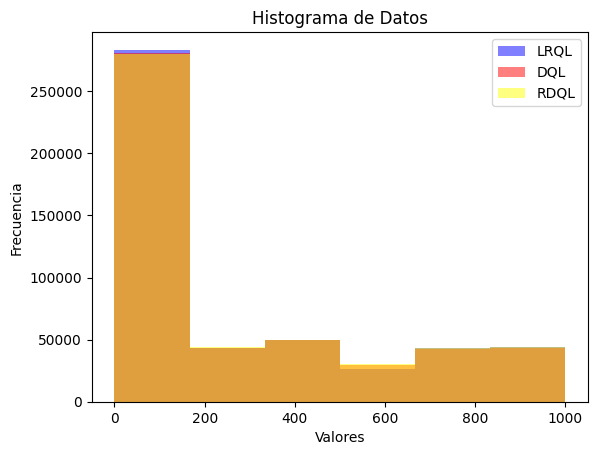

In [33]:
plt.hist(r_t2, bins=env.J, alpha=0.5, color='blue',label="LRQL")  # 'bins' determina la cantidad de divisiones en el histograma
plt.hist(r_t, bins=env.J, alpha=0.5, color='red',label="DQL")  # 'bins' determina la cantidad de divisiones en el histograma
plt.hist(r_t1, bins=env.J, alpha=0.5, color='yellow',label="RDQL")  # 'bins' determina la cantidad de divisiones en el histograma

plt.title('Histograma de Datos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

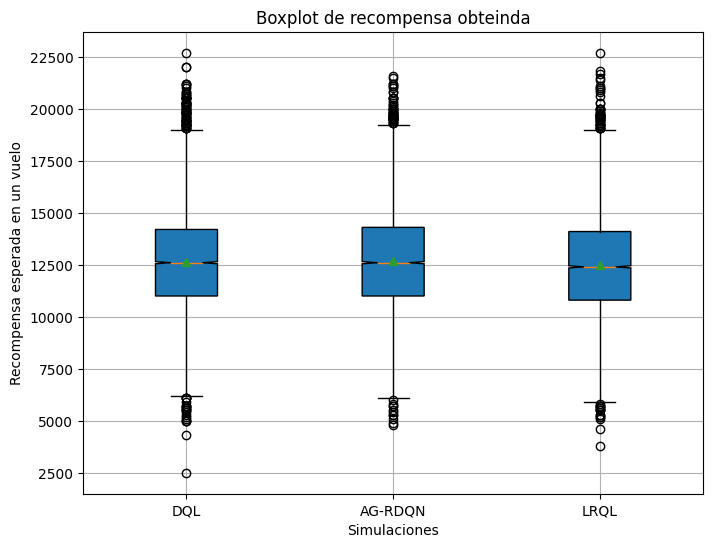

In [34]:
datos = [Rs, Rs1, Rs2]
plt.figure(figsize=(8, 6))
plt.boxplot(datos, patch_artist=True, notch=True, showmeans=True)

plt.title('Boxplot de recompensa obteinda')
plt.xlabel('Simulaciones')
plt.ylabel('Recompensa esperada en un vuelo')
plt.xticks([1, 2, 3], ['DQL', 'AG-RDQN', 'LRQL'])  # Cambiar etiquetas del eje x
plt.grid(True)

plt.show()